# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from skimpy import clean_columns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format


params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)

#### Load Dataset

In [207]:
df_main = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
df = df_main.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [208]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [209]:
df = (clean_columns(df))

4 column names have been cleaned

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                200 non-null    object
 1   age                   200 non-null    int64 
 2   annual_income_k_$     200 non-null    int64 
 3   spending_score_1_100  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [211]:
df.duplicated().sum()

0

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [212]:
df.describe()

,age,annual_income_k_$,spending_score_1_100
count,200.000,200.000,200.000
mean,38.850,60.560,50.200
std,13.969,26.265,25.824
min,18.000,15.000,1.000
25%,28.750,41.500,34.750
50%,36.000,61.500,50.000
75%,49.000,78.000,73.000
max,70.000,137.000,99.000


In [213]:
df.describe(include="object")

,gender
count,200
unique,2
top,Female
freq,112


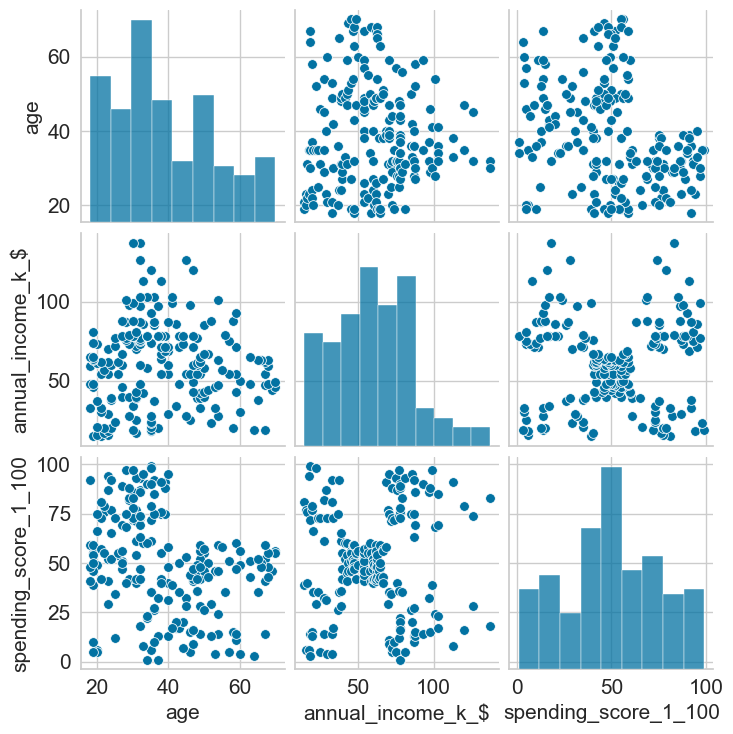

In [214]:
sns.pairplot(df)

In [215]:
fig = px.scatter_3d(x=df["age"],
                   y=df["annual_income_k_$"],
                   z=df["spending_score_1_100"],
                   color=df.gender)
                   #hover_name=df["Country"])

fig.show()

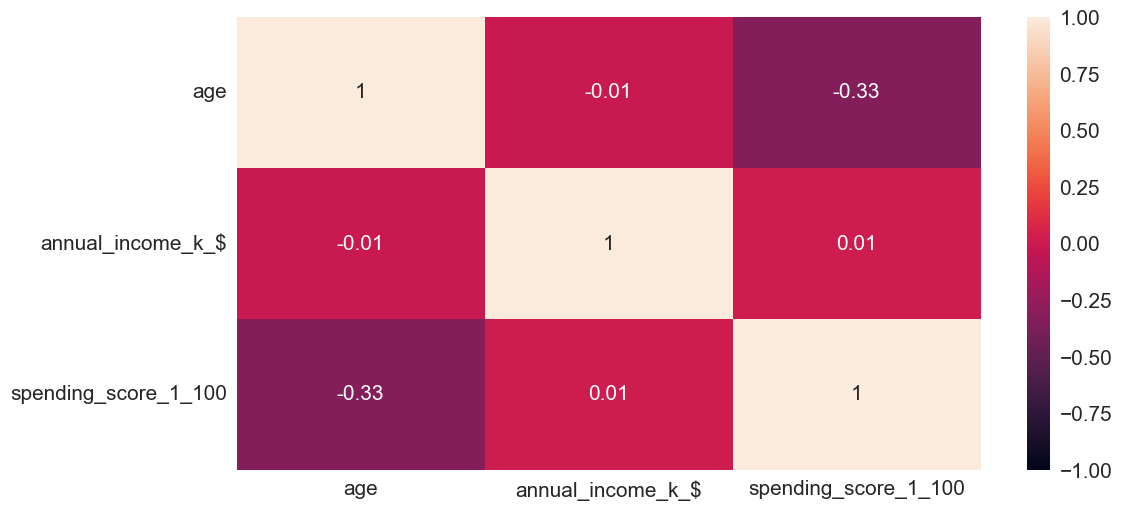

In [216]:
sns.heatmap( df.corr().round(2), 
    #mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)
plt.show();

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [217]:
df["gender"] =df.gender.map({"Male":1, "Female":0})

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [219]:
df_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [220]:
X =df_scaled[:, [1,3]]
X

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

#### *ii. Determine optimal number of clusters*

In [221]:
from pyclustertend import hopkins
hopkins(X, X.shape[0])

0.3215739764964157

In [222]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit_predict(X)
print(K_means_model.labels_)
print(K_means_model.inertia_)

[4 0 4 0 4 0 2 0 2 0 3 0 2 0 2 0 4 0 2 0 4 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2
 0 2 0 3 0 1 0 2 0 1 4 4 4 1 0 4 3 1 1 1 3 4 1 3 4 3 1 3 4 1 3 4 4 3 1 3 3
 3 4 1 1 4 1 3 1 3 1 4 1 1 4 0 1 3 4 1 1 4 4 1 4 1 4 4 1 3 4 1 4 3 1 3 3 3
 4 1 4 4 4 3 1 1 1 4 1 1 0 4 0 1 0 2 0 2 0 4 0 4 0 2 0 4 0 2 0 4 0 4 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
71.2955659221944


Text(0.5, 1.0, 'elbow method')

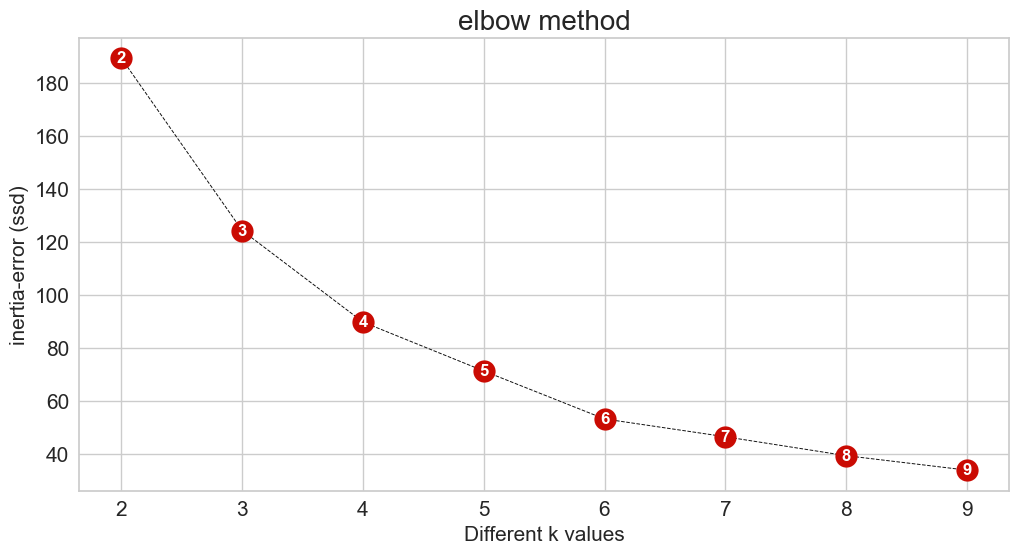

In [223]:
ssd = [] #sum squared distance
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
plt.plot(
    K, ssd, 
    color='k', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")

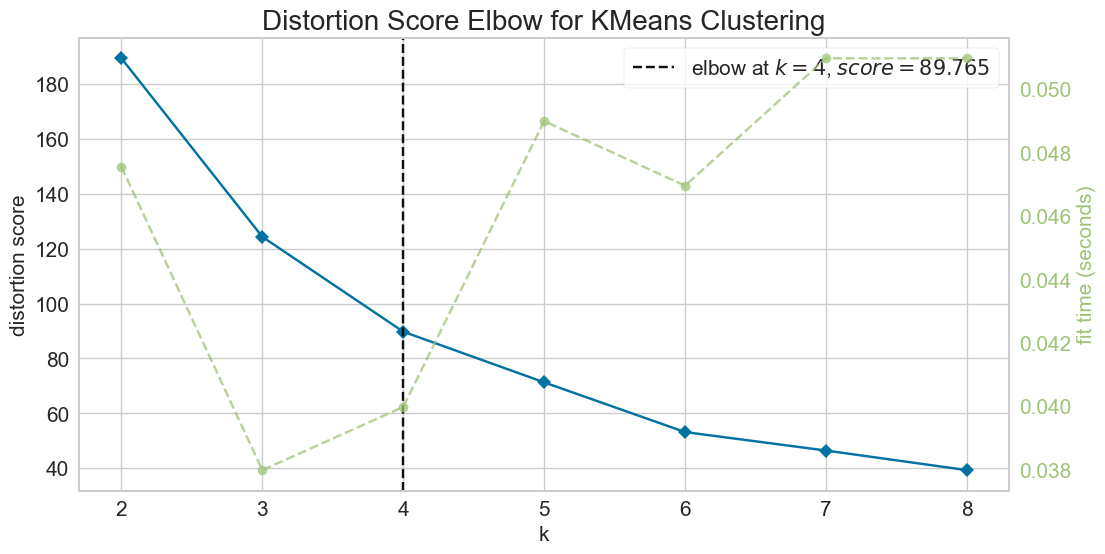

In [224]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433
For n_clusters=9, the silhouette score is 0.4230225675027671


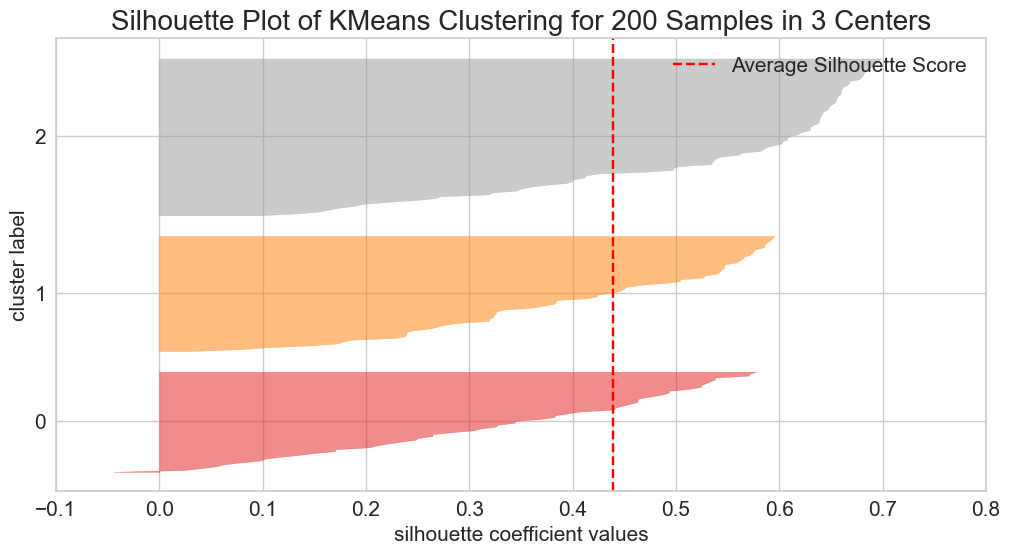

In [225]:
from sklearn.metrics import silhouette_score

silhouette_score(X, K_means_model.labels_)
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [226]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit_predict(X)
print(K_means_model.labels_)
print(K_means_model.inertia_)

[4 0 4 0 4 0 2 0 2 0 3 0 2 0 2 0 4 0 2 0 4 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2
 0 2 0 3 0 1 0 2 0 1 4 4 4 1 0 4 3 1 1 1 3 4 1 3 4 3 1 3 4 1 3 4 4 3 1 3 3
 3 4 1 1 4 1 3 1 3 1 4 1 1 4 0 1 3 4 1 1 4 4 1 4 1 4 4 1 3 4 1 4 3 1 3 3 3
 4 1 4 4 4 3 1 1 1 4 1 1 0 4 0 1 0 2 0 2 0 4 0 4 0 2 0 4 0 2 0 4 0 4 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
71.2955659221944


In [227]:
df_x = pd.DataFrame(X, columns=["age","spending_score_1_100"])
df_x["predicted_clusters"] = K_means_model.labels_
df_x["predicted_clusters"].value_counts()

0    64
2    41
4    38
1    36
3    21
Name: predicted_clusters, dtype: int64

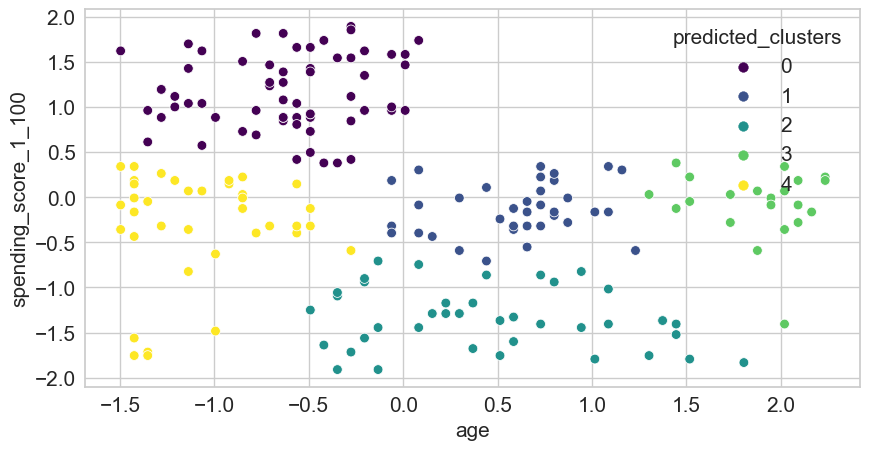

In [228]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_x["age"], df_x["spending_score_1_100"], hue= df_x["predicted_clusters"], palette= "viridis")
plt.show();

#### *iv. Visualizing and Labeling All the Clusters*

In [229]:
cluster_center = K_means_model.cluster_centers_
cluster_center

array([[-0.62504301,  1.16294838],
       [ 0.59486612, -0.14579653],
       [ 0.47287247, -1.34568786],
       [ 1.87328147, -0.0798615 ],
       [-1.05629236, -0.32446652]])

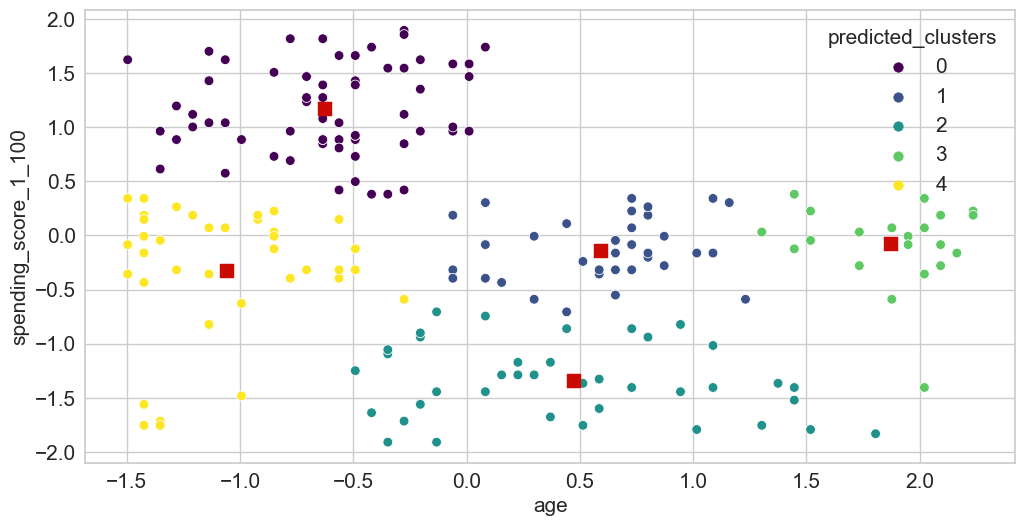

In [230]:
cluster_center = pd.DataFrame(cluster_center, columns=["X","Y"])
sns.scatterplot(df_x["age"], df_x["spending_score_1_100"], hue= df_x["predicted_clusters"], palette= "viridis")
plt.scatter(cluster_center["X"], cluster_center["Y"], marker="s", c="r", s=100)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [231]:
X =df_scaled[:, [2,3]]
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [232]:
from pyclustertend import hopkins
hopkins(X, X.shape[0])

0.30927339788975194

In [233]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit_predict(X)
print(K_means_model.labels_)
print(K_means_model.inertia_)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
65.56840815571681


#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

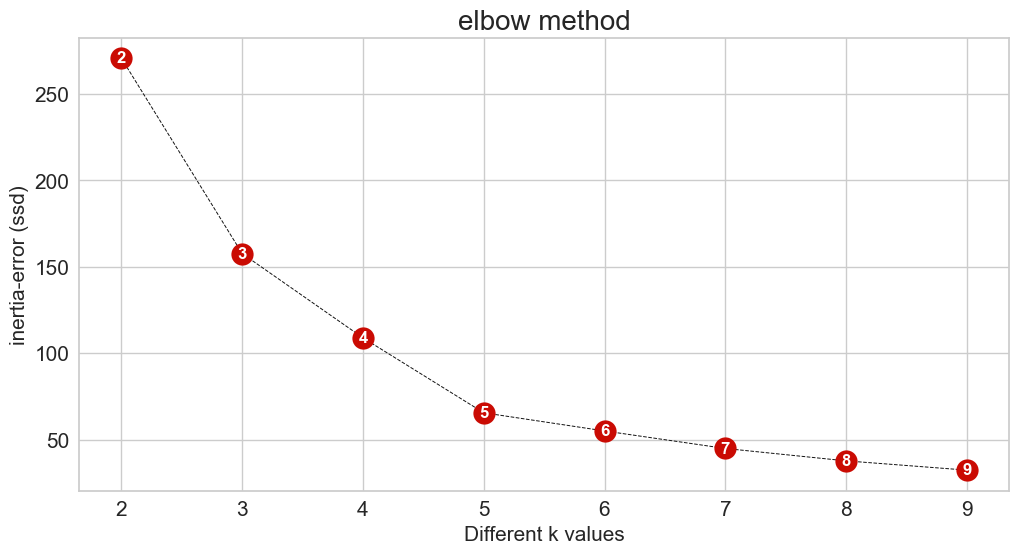

In [234]:
ssd = [] #sum squared distance
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
plt.plot(
    K, ssd, 
    color='k', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")

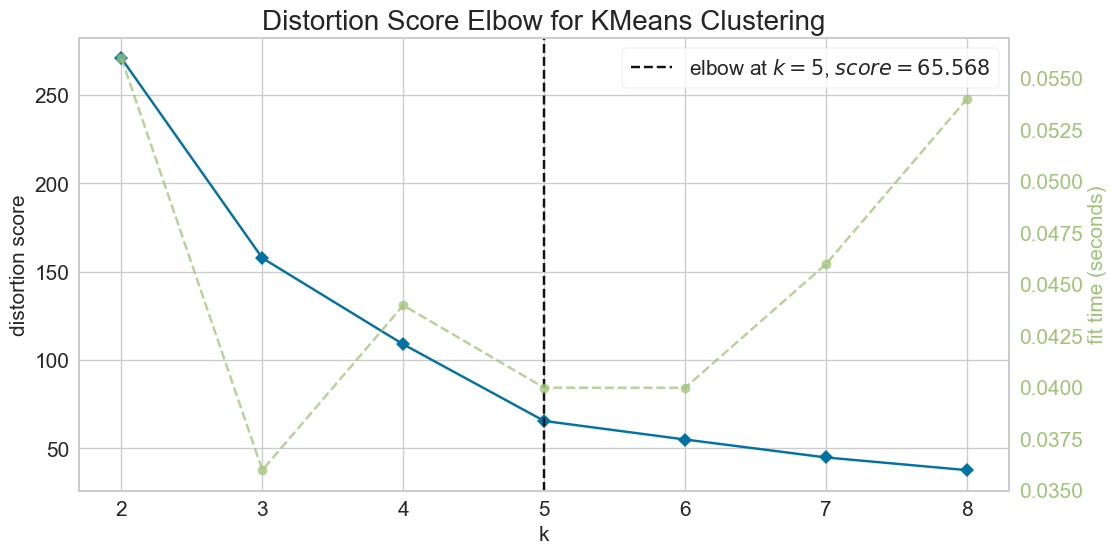

In [235]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706
For n_clusters=9, the silhouette score is 0.45532159949822093


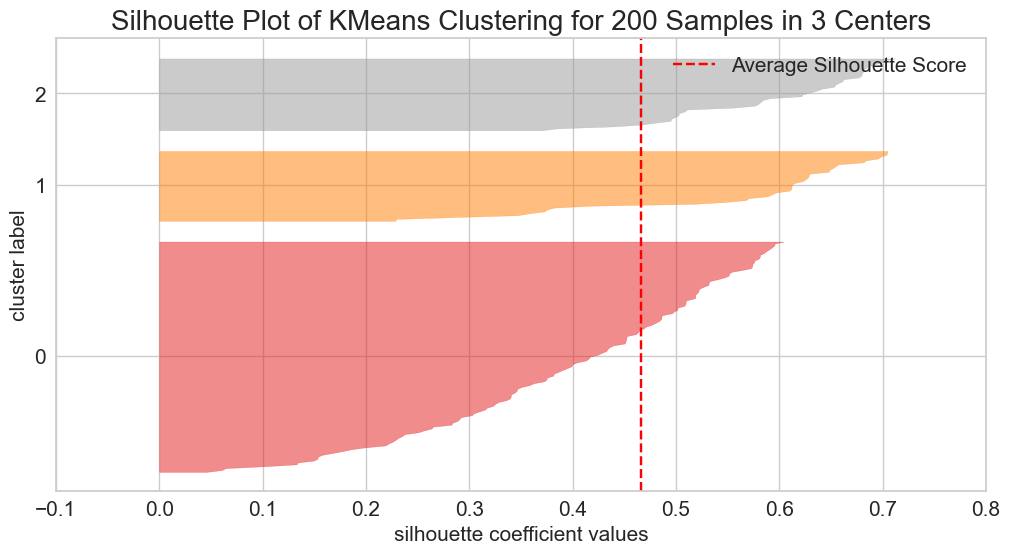

In [236]:
from sklearn.metrics import silhouette_score

silhouette_score(X, K_means_model.labels_)
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [237]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit_predict(X)
print(K_means_model.labels_)
print(K_means_model.inertia_)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
65.56840815571681


#### *iv. Visualizing and Labeling All the Clusters*

In [238]:
df_x = pd.DataFrame(X, columns=["annual_income_k_$","spending_score_1_100"])
df_x["predicted_clusters"] = K_means_model.labels_
df_x["predicted_clusters"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters, dtype: int64

In [239]:
cluster_center = K_means_model.cluster_centers_
cluster_center

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

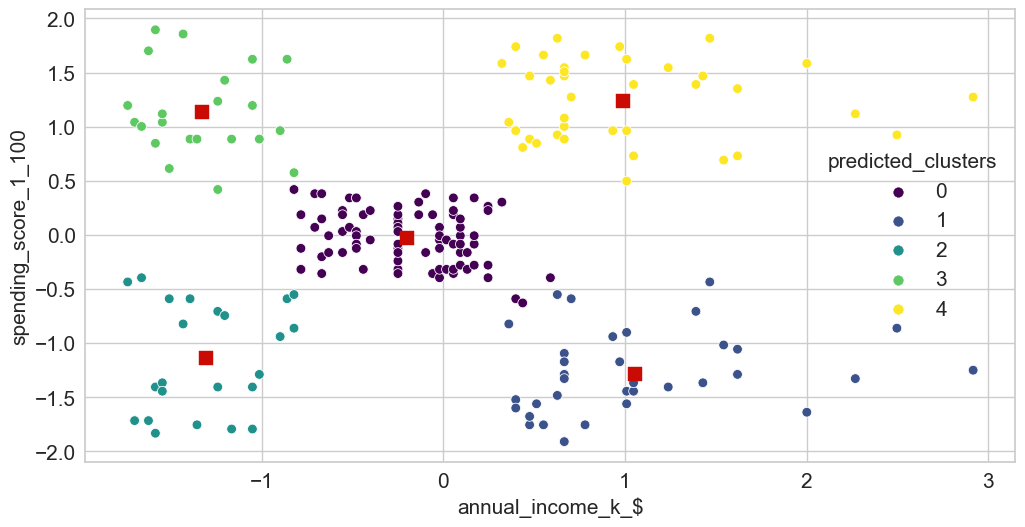

In [240]:
cluster_center = pd.DataFrame(cluster_center, columns=["X","Y"])
sns.scatterplot(df_x["annual_income_k_$"], df_x["spending_score_1_100"], hue= df_x["predicted_clusters"], palette= "viridis")
plt.scatter(cluster_center["X"], cluster_center["Y"], marker="s", c="r", s=100)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

#### Clustering based on Age and Spending Score- x1

In [241]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [242]:
X1 =df_scaled[:, [1,3]]
X1 = pd.DataFrame(X1, columns=["age","spending_score_1_100"])
X1

,age,spending_score_1_100
0,-1.425,-0.435
1,-1.281,1.196
2,-1.353,-1.716
3,-1.138,1.040
4,-0.563,-0.396
...,...,...
195,-0.276,1.118
196,0.441,-0.862
197,-0.492,0.924
198,-0.492,-1.250


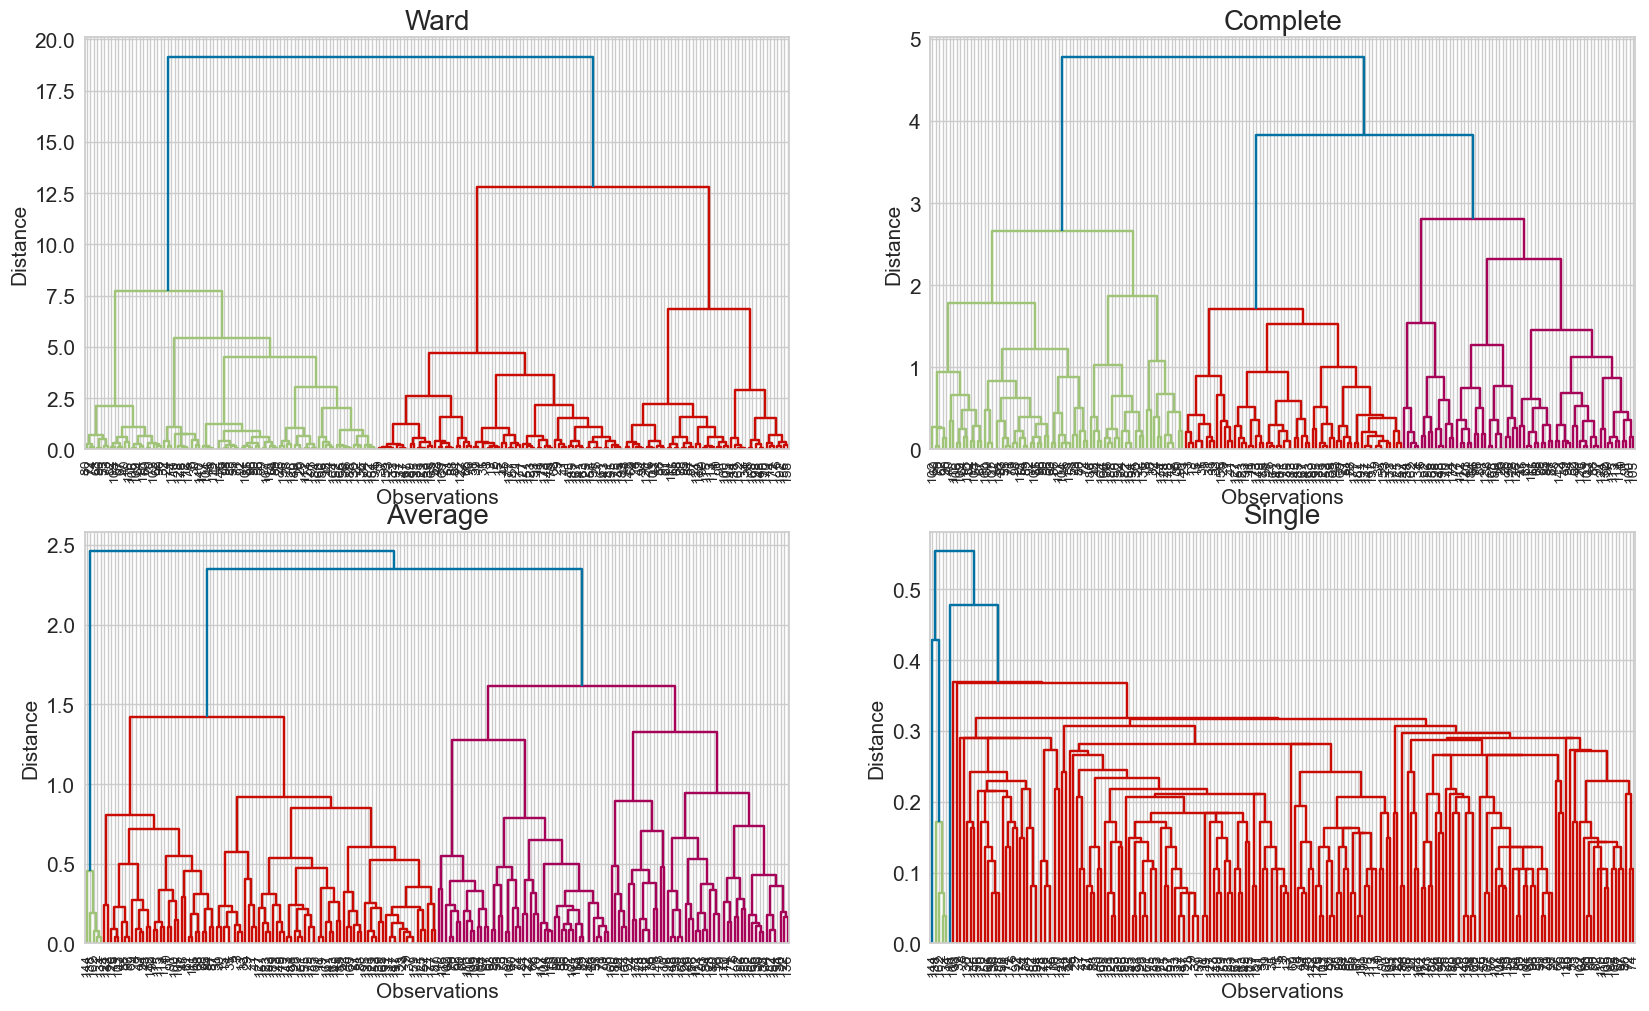

In [243]:
plt.figure(figsize = (20,12))
for i,j in enumerate(["ward","complete","average","single"]):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(X1, j), leaf_font_size = 10)#, truncate_mode='lastp', p=10)
    x += 1

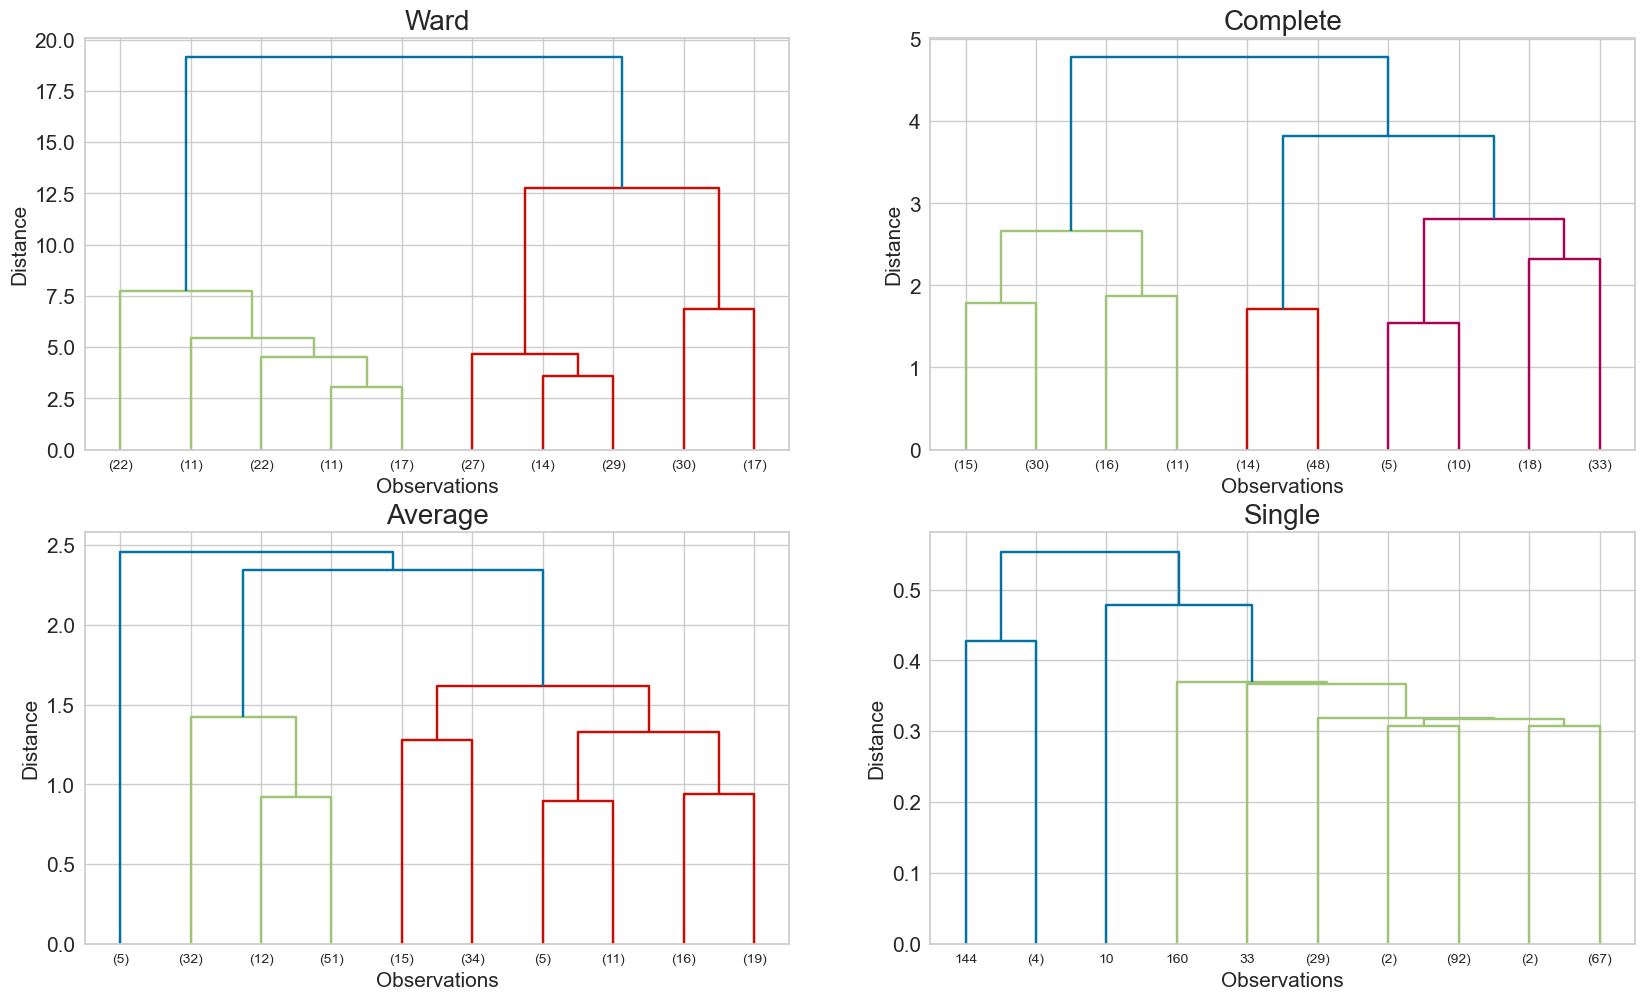

In [244]:
plt.figure(figsize = (20,12))
for i,j in enumerate(["ward","complete","average","single"]):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(X1, j), leaf_font_size = 10, truncate_mode='lastp', p=10)
    x += 1

#### Clustering based on Annual Income and Spending Score- x1

In [245]:
X2 =df_scaled[:, [2,3]]
X2 = pd.DataFrame(X2, columns=["annual_income_k_$","spending_score_1_100"])
X2

,annual_income_k_$,spending_score_1_100
0,-1.739,-0.435
1,-1.739,1.196
2,-1.701,-1.716
3,-1.701,1.040
4,-1.663,-0.396
...,...,...
195,2.269,1.118
196,2.498,-0.862
197,2.498,0.924
198,2.918,-1.250


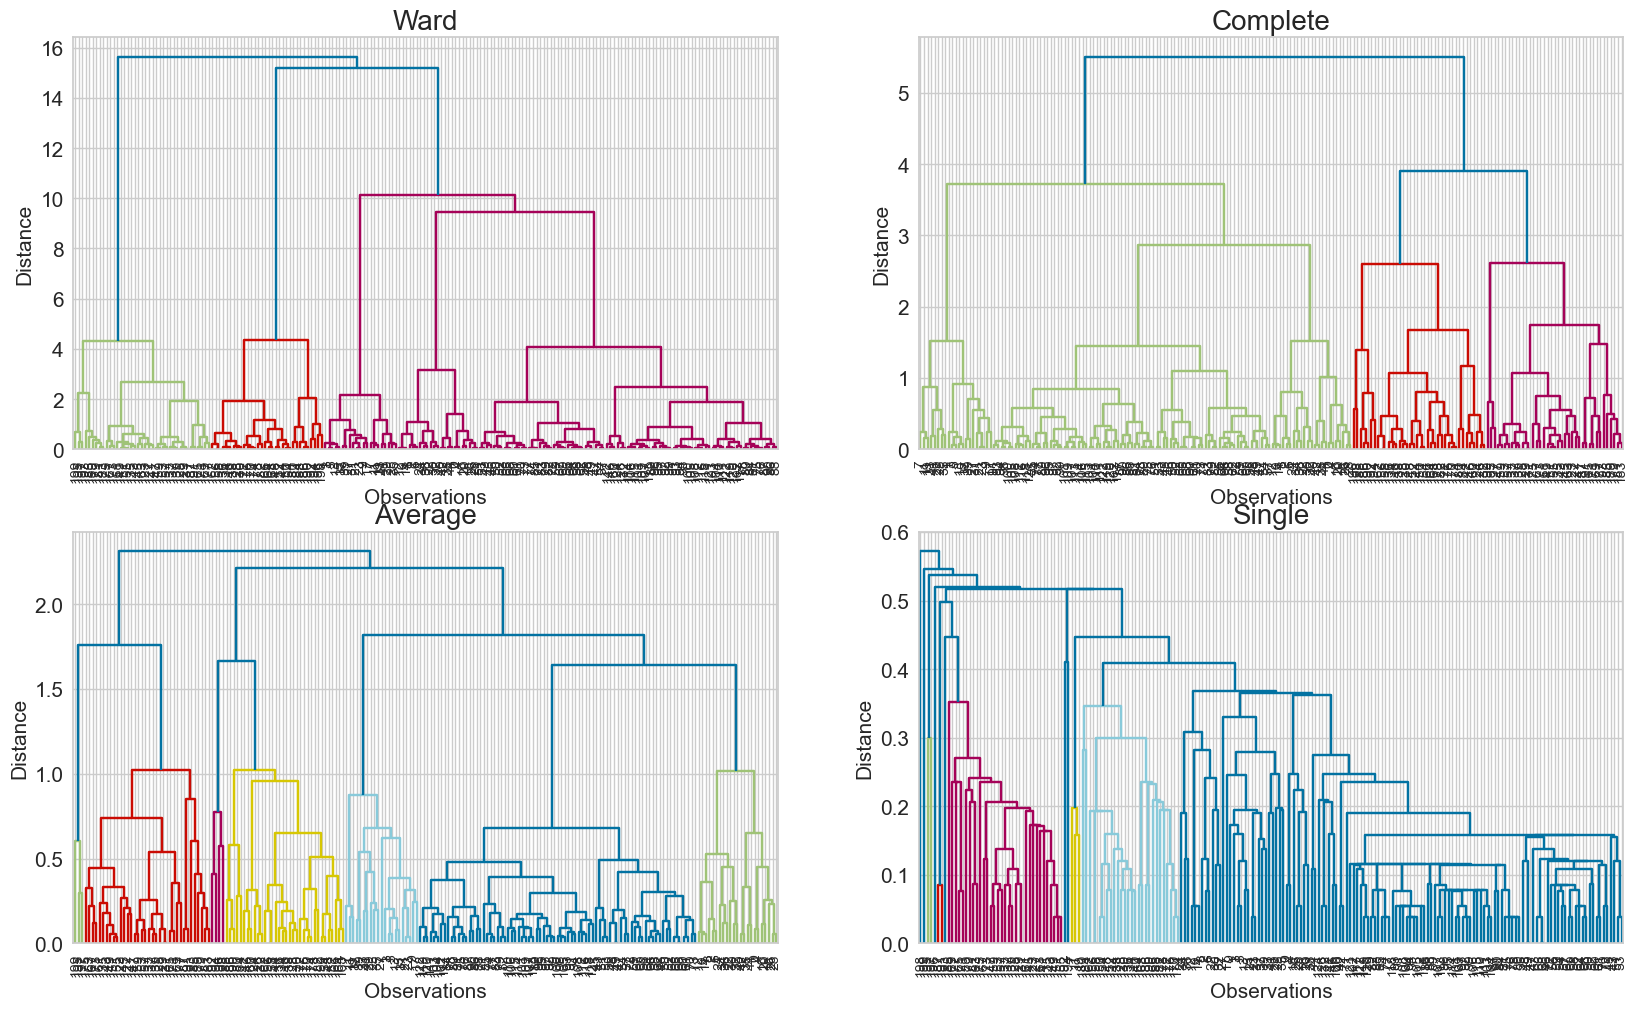

In [246]:
plt.figure(figsize = (20,12))
for i,j in enumerate(["ward","complete","average","single"]):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(X2, j), leaf_font_size = 10)#, truncate_mode='lastp', p=10)
    x += 1

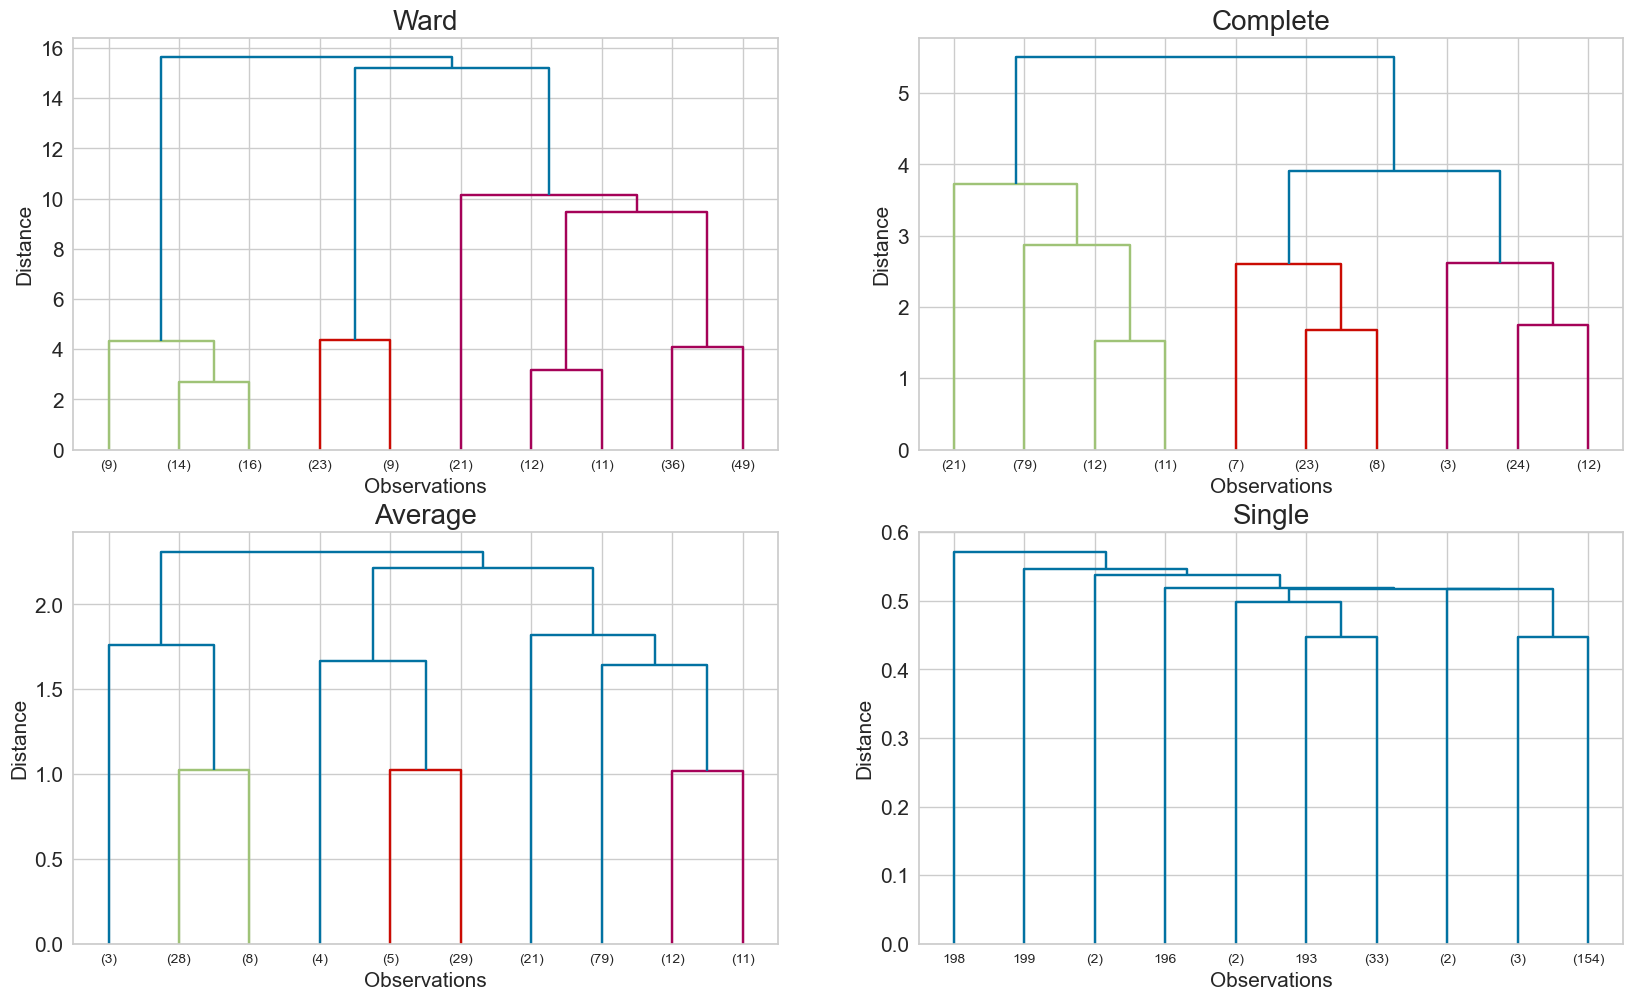

In [247]:
plt.figure(figsize = (20,12))
for i,j in enumerate(["ward","complete","average","single"]):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(X2, j), leaf_font_size = 10, truncate_mode='lastp', p=10)
    x += 1

## Clustering based on Annual Income and Spending Score- x2

In [248]:
from sklearn.cluster import AgglomerativeClustering

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [249]:
K = range(2,10)

for k in K:
    model1 = AgglomerativeClustering(n_clusters = k)
    model1.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model1.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


#### Annual Income and Spending Score- x2

In [250]:
X =df_scaled[:, [2,3]]
K = range(2,10)

for k in K:
    model2 = AgglomerativeClustering(n_clusters = k)
    model2.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model2.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [251]:
model1 = AgglomerativeClustering(n_clusters=4)
model1.fit(X1)
X1['labels'] = model1.labels_
X1

,age,spending_score_1_100,labels
0,-1.425,-0.435,0
1,-1.281,1.196,2
2,-1.353,-1.716,0
3,-1.138,1.040,2
4,-0.563,-0.396,0
...,...,...,...
195,-0.276,1.118,2
196,0.441,-0.862,1
197,-0.492,0.924,2
198,-0.492,-1.250,0


#### Annual Income and Spending Score- x2

In [252]:
model2 = AgglomerativeClustering(n_clusters=5)
model2.fit(X2)
model2.labels_
X2['labels'] = model2.labels_
X2

,annual_income_k_$,spending_score_1_100,labels
0,-1.739,-0.435,4
1,-1.739,1.196,3
2,-1.701,-1.716,4
3,-1.701,1.040,3
4,-1.663,-0.396,4
...,...,...,...
195,2.269,1.118,1
196,2.498,-0.862,0
197,2.498,0.924,1
198,2.918,-1.250,0


In [253]:
df["X1_label"] = model1.labels_
df["X2_label"] = model2.labels_
df

,gender,age,annual_income_k_$,spending_score_1_100,X1_label,X2_label
CustomerID,,,,,,
1,1,19,15,39,0,4
2,1,21,15,81,2,3
3,0,20,16,6,0,4
4,0,23,16,77,2,3
5,0,31,17,40,0,4
...,...,...,...,...,...,...
196,0,35,120,79,2,1
197,0,45,126,28,1,0
198,1,32,126,74,2,1


#### Interpretation based on Age and Spending Score- x1

In [254]:
df["gender"] =df.gender.map({1:"Male", 0:"Female"})

In [255]:
clus_pred = X1.groupby("labels").mean().T
clus_pred

labels,0,1,2,3
age,-0.895,0.692,-0.567,1.798
spending_score_1_100,-0.599,-0.775,1.073,0.017


<AxesSubplot:>

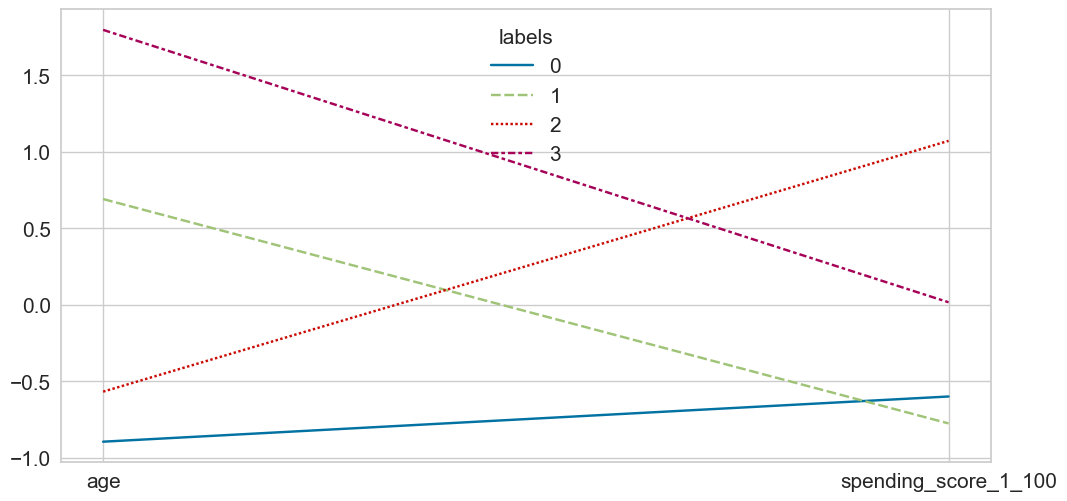

In [256]:
sns.lineplot(data=clus_pred)

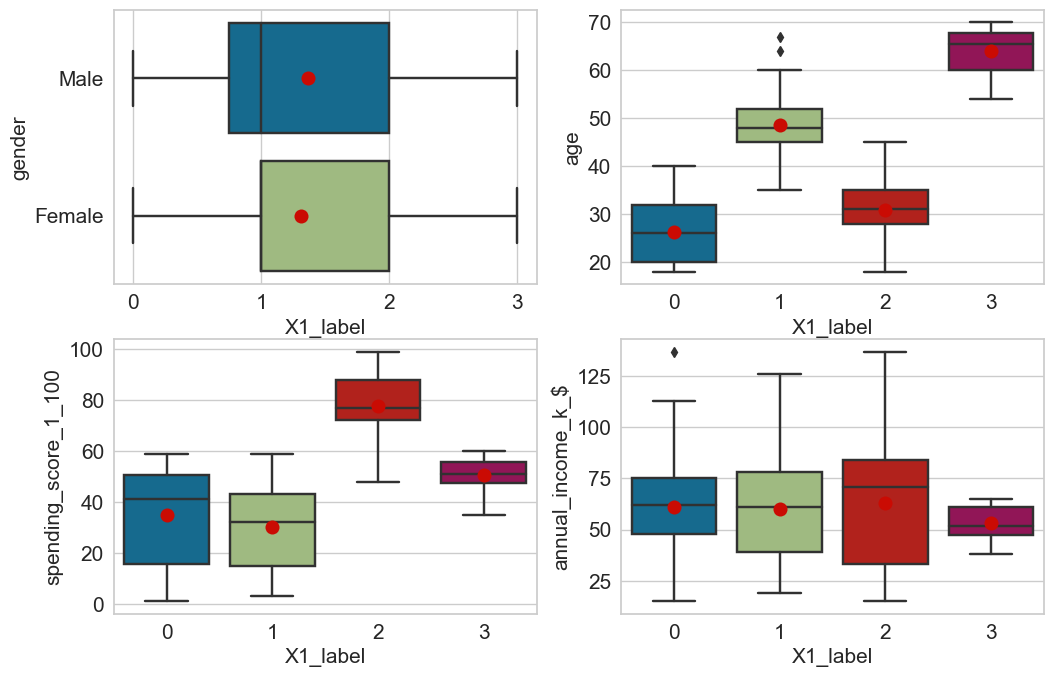

In [257]:
plt.figure(figsize=(12,8))

for i, col in enumerate(["gender", "age","spending_score_1_100","annual_income_k_$"]):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=df["X1_label"], y=col, data=df)

### Conclusion

**cluster 0**: The average age is around 25.both annula_income and spending_scores are on average. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 47, the annula_income is average, spending_scores are average. 
It should be researched what can be done to direct to more spending.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 3** : The average age is around 65, both annula_income is little bit low and spending_scores are little bit high. 
It should be researched what can be done to direct to more spending.




    


#### Interpretation based on Annual Income and Spending Score- x2

In [258]:
clus_pred = X2.groupby("labels").mean().T
clus_pred

labels,0,1,2,3,4
annual_income_k_$,1.101,0.992,-0.181,-1.354,-1.308
spending_score_1_100,-1.343,1.240,-0.042,1.159,-1.137


<AxesSubplot:>

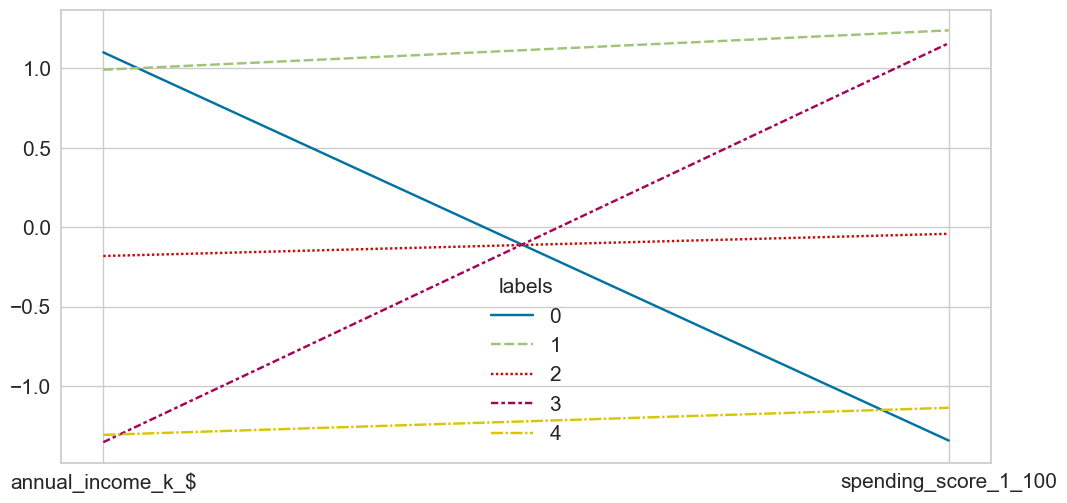

In [259]:
sns.lineplot(data=clus_pred)

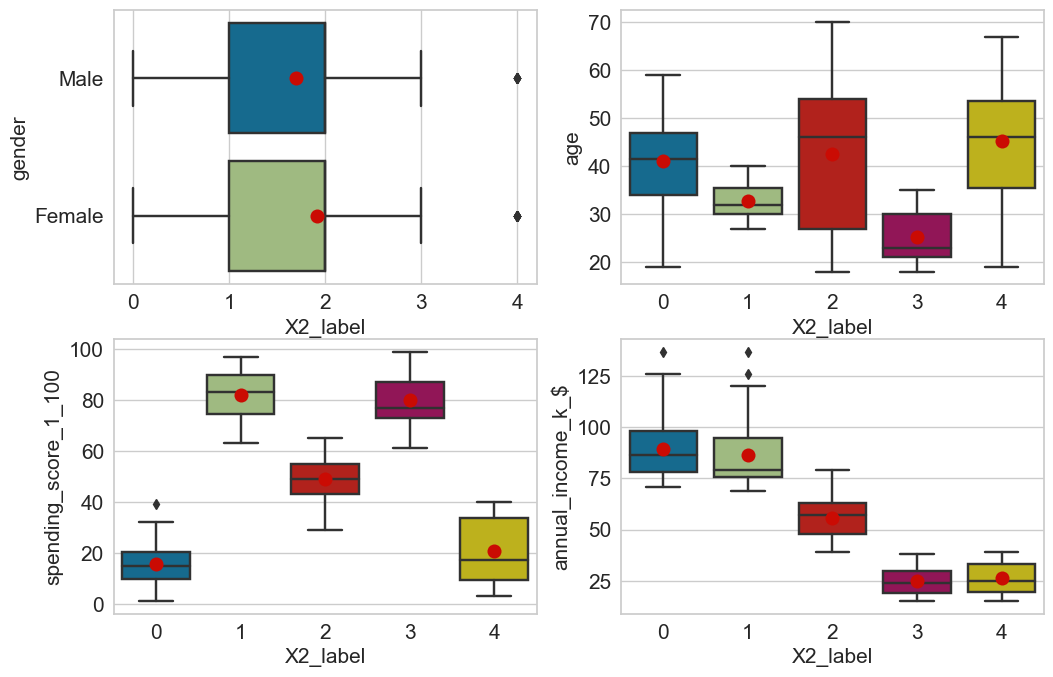

In [260]:
plt.figure(figsize=(12,8))

for i, col in enumerate(["gender", "age","spending_score_1_100","annual_income_k_$"]):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=df["X2_label"], y=col, data=df)

**cluster 0**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.





## Conclusion

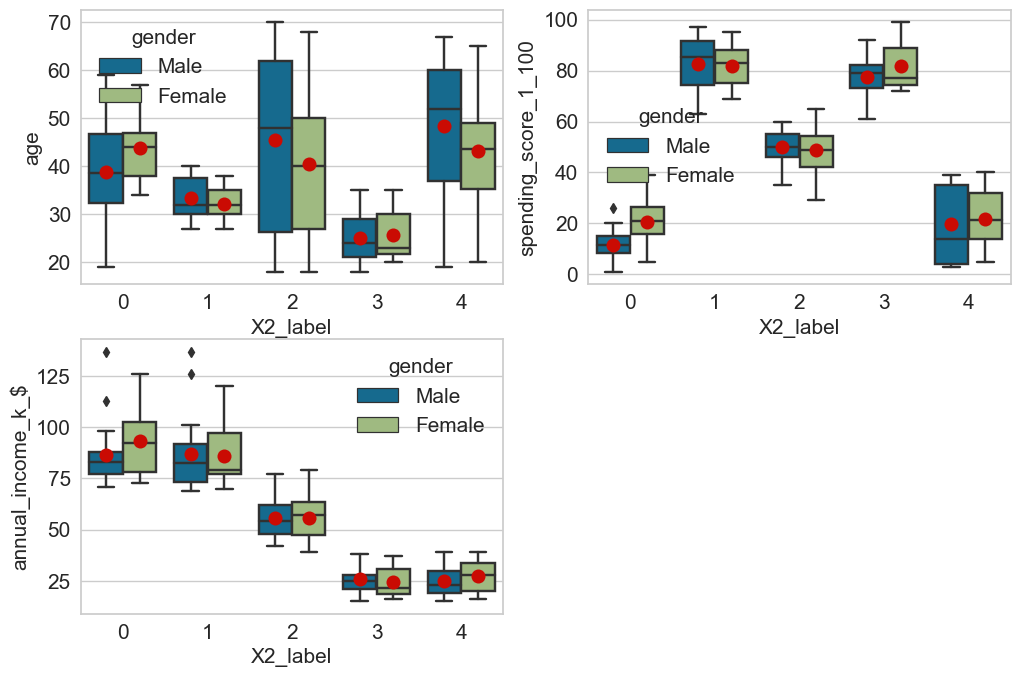

In [261]:
plt.figure(figsize=(12,8))

for i, col in enumerate(["age","spending_score_1_100","annual_income_k_$"]):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=df["X2_label"], y=col, data=df, hue="gender")

### Female

**cluster 0** : The average age is around 45, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30, both annula_income and spending_scores are on very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 

**cluster 1**: The average age is around 40, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

**cluster 4**: The average age is around 25, their annual income is very low but their spending_score is very high. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 3**: The average age is around 45, both annula_income and spending_scores are on very low. It can be directed to shopping with gift certificates.



### Male

**cluster 0** : The average age is around 40, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30, both annula_income and spending_scores are on very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 

**cluster 1**: The average age is around 45, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

**cluster 4**: The average age is around 25, their annual income is very low but their spending_score is very high. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 3**: The average age is around 50, both annula_income and spending_scores are on very low. It can be directed to shopping with gift certificates.

